# Predict sales revenue

* Suggest a market plan for next year that will result in high product sales?


* What information would be useful in order to provide such a recommendation?


* Is there a relationship between advertising budget and sales? Our goal should be to determine whether the data provide evidence of an association between advertising expenditure and sales. If the evidence is weak, then one might argue that no money should be spent on advertising!


* How strong is the relationship between advertising budget and sales? Assuming that there is a relationship between advertising and sales, we would like to know the strength of this relationship. In other words, given a certain advertising budget, can we predict sales with a high level of accuracy? This would be a strong relationship. Or is a prediction of sales based on advertising expenditure only slightly better than a random guess? This would be a weak relationship?


* Which media contribute to sales? Do all three media TV, radio and newspaper contribute to sales or do just one or two of the media contribute?


* How accurately can we estimate the effect of each medium on sales? For every dollar spent on advertising in a particular medium, by what amount will sales increase? How accurately can we predict this amount of increase?


* How accurately can we predict future sales? For any given level of television, radio or newspaper advertising, what is our prediction for sales and what is the accuracy of this prediction?


* Is the relationship linear? If there is approximately a straight-line relationship between advertising expenditure in the various media and sales, then linear regression is an appropriate tool. If not, then it may still be possible to transform the predictor or the response so that linear regression can be used


* Is there synergy among the advertising media? Perhaps spending 50,000 on television advertising and 50,000 on radio advertising results in more sales than allocating 100,000 to either television or radio individually. In marketing, this is known as a **synergy effect**, while in statistics it is called an **interaction effect**.


Feature Descriptions
1. TV - Spend on TV Advertisements
2. Radio - Spend on radio Advertisements
3. Newspaper - Spend on newspaper Advertisements
4. Sales - Sales revenue generated

Sales is dependent / target variable

TV, Radio and Newspaper are independent variables

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("Advertising.csv")

In [3]:
data.head(2)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4


In [4]:
data.info() # no null values - as all columns have 200 non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


First column is index and we do not need it. So remove the first column 

In [5]:
data = data.drop("Unnamed: 0", axis = 1)
#data = data[["TV", "Radio", "Newspaper", "Sales"]]

In [6]:
# Model 1
x = data[["TV"]]
y = data[["Sales"]]


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                        random_state = 1)
    

In [10]:
bx_train.head()

,TV
116,139.2
67,139.3
78,5.4
42,293.6
17,281.4


In [11]:
x_test.head()

,TV
58,210.8
40,202.5
34,95.7
102,280.2
184,253.8


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)


In [14]:
x_train.head()

,0
0,0.468380
1,0.468718
2,0.015894
3,0.990531
4,0.949273


In [15]:
x_test.head()

,0
0,0.718066
1,0.688779
2,0.311927
3,0.962950
4,0.869795


In [18]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt

import matplotlib.pyplot as plt


In [24]:
rmse_val = []

for k in range(1, 20):
    model = neighbors.KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    rmse_val.append(rmse)
    print("RMSE is {} for k = {}".format(rmse, k ))

RMSE is 4.538777368411013 for k = 1
RMSE is 3.717240239747762 for k = 2
RMSE is 3.416707316831351 for k = 3
RMSE is 3.3448545683382607 for k = 4
RMSE is 3.2854436534507787 for k = 5
RMSE is 3.1684139916087704 for k = 6
RMSE is 3.2745581827961168 for k = 7
RMSE is 3.4064564157640413 for k = 8
RMSE is 3.30170737724261 for k = 9
RMSE is 3.3294346366913405 for k = 10
RMSE is 3.316246841377713 for k = 11
RMSE is 3.276100147420088 for k = 12
RMSE is 3.2082015521489677 for k = 13
RMSE is 3.18978839423558 for k = 14
RMSE is 3.1890503637011167 for k = 15
RMSE is 3.202969406790101 for k = 16
RMSE is 3.1967869718646056 for k = 17
RMSE is 3.199937386861717 for k = 18
RMSE is 3.1981671083896783 for k = 19


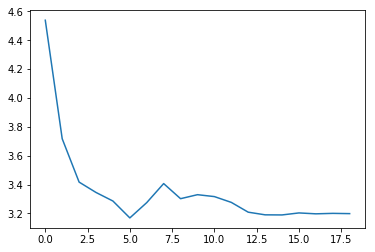

In [25]:
plt.plot(rmse_val)

In [41]:
rmse = pd.DataFrame(data=rmse_val, columns=['rmse'], index=range(1, 20))


In [42]:
rmse.head()

,rmse
1,4.538777
2,3.717240
3,3.416707
4,3.344855
5,3.285444


In [43]:
rmse.rmse.idxmin()

6

In [50]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':range(1,9)}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=10)
model.fit(x_train,y_train)
model.best_params_


{'n_neighbors': 8}